In [1]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

data = sqlContext.read.format('com.databricks.spark.csv').options(header='false', inferschema='true', delimiter=',')\
    .load('big-data/YearPredictionMSD.txt')

In [2]:
data.printSchema

<bound method DataFrame.printSchema of DataFrame[C0: int, C1: double, C2: double, C3: double, C4: double, C5: double, C6: double, C7: double, C8: double, C9: double, C10: double, C11: double, C12: double, C13: double, C14: double, C15: double, C16: double, C17: double, C18: double, C19: double, C20: double, C21: double, C22: double, C23: double, C24: double, C25: double, C26: double, C27: double, C28: double, C29: double, C30: double, C31: double, C32: double, C33: double, C34: double, C35: double, C36: double, C37: double, C38: double, C39: double, C40: double, C41: double, C42: double, C43: double, C44: double, C45: double, C46: double, C47: double, C48: double, C49: double, C50: double, C51: double, C52: double, C53: double, C54: double, C55: double, C56: double, C57: double, C58: double, C59: double, C60: double, C61: double, C62: double, C63: double, C64: double, C65: double, C66: double, C67: double, C68: double, C69: double, C70: double, C71: double, C72: double, C73: double, C7

In [3]:
data.cache()
data.count()

515345

In [4]:
data.describe().collect()

[Row(summary=u'count', C0=u'515345', C1=u'515345', C2=u'515345', C3=u'515345', C4=u'515345', C5=u'515345', C6=u'515345', C7=u'515345', C8=u'515345', C9=u'515345', C10=u'515345', C11=u'515345', C12=u'515345', C13=u'515345', C14=u'515345', C15=u'515345', C16=u'515345', C17=u'515345', C18=u'515345', C19=u'515345', C20=u'515345', C21=u'515345', C22=u'515345', C23=u'515345', C24=u'515345', C25=u'515345', C26=u'515345', C27=u'515345', C28=u'515345', C29=u'515345', C30=u'515345', C31=u'515345', C32=u'515345', C33=u'515345', C34=u'515345', C35=u'515345', C36=u'515345', C37=u'515345', C38=u'515345', C39=u'515345', C40=u'515345', C41=u'515345', C42=u'515345', C43=u'515345', C44=u'515345', C45=u'515345', C46=u'515345', C47=u'515345', C48=u'515345', C49=u'515345', C50=u'515345', C51=u'515345', C52=u'515345', C53=u'515345', C54=u'515345', C55=u'515345', C56=u'515345', C57=u'515345', C58=u'515345', C59=u'515345', C60=u'515345', C61=u'515345', C62=u'515345', C63=u'515345', C64=u'515345', C65=u'515345

In [7]:
avg_by_year = data.groupBy('C0').mean().collect()

In [ ]:
avg_by_year[0]

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


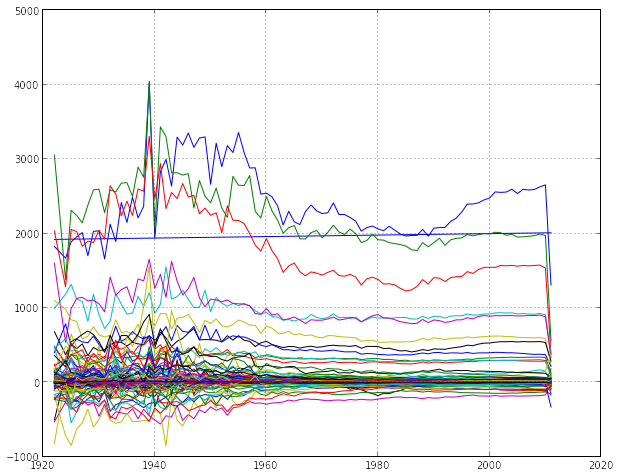

In [8]:
import matplotlib.pyplot as plt
for i in range(1,len(avg_by_year[0])):
    plt.plot(map(lambda r:r[0],avg_by_year), map(lambda r:r[i],avg_by_year))
plt.grid(True)
plt.show()

In [9]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import PCA
from pyspark.ml.feature import Normalizer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline


all_assembler = VectorAssembler(
    inputCols=map(lambda s:s.name,data.schema.fields)[:-1],
    outputCol="features")
normalizer = Normalizer(inputCol="features", outputCol="norm_features")
pca = PCA(k=2, inputCol="norm_features", outputCol="pca_features")
pca_pipeline = Pipeline(stages=[all_assembler, normalizer, pca])
pca_model = pca_pipeline.fit(data)
pca_model.transform(data).first()

Row(C0=2001, C1=49.94357, C2=21.47114, C3=73.0775, C4=8.74861, C5=-17.40628, C6=-13.09905, C7=-25.01202, C8=-12.23257, C9=7.83089, C10=-2.46783, C11=3.32136, C12=-2.31521, C13=10.20556, C14=611.10913, C15=951.0896, C16=698.11428, C17=408.98485, C18=383.70912, C19=326.51512, C20=238.11327, C21=251.42414, C22=187.17351, C23=100.42652, C24=179.19498, C25=-8.41558, C26=-317.87038, C27=95.86266, C28=48.10259, C29=-95.66303, C30=-18.06215, C31=1.96984, C32=34.42438, C33=11.7267, C34=1.3679, C35=7.79444, C36=-0.36994, C37=-133.67852, C38=-83.26165, C39=-37.29765, C40=73.04667, C41=-37.36684, C42=-3.13853, C43=-24.21531, C44=-13.23066, C45=15.93809, C46=-18.60478, C47=82.15479, C48=240.5798, C49=-10.29407, C50=31.58431, C51=-25.38187, C52=-3.90772, C53=13.29258, C54=41.5506, C55=-7.26272, C56=-21.00863, C57=105.50848, C58=64.29856, C59=26.08481, C60=-44.5911, C61=-8.30657, C62=7.93706, C63=-10.7366, C64=-95.44766, C65=-82.03307, C66=-35.59194, C67=4.69525, C68=70.95626, C69=28.09139, C70=6.020

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [11]:
import matplotlib.pyplot as plt
sampling_fraction = 0.01
pca_data = pca_model.transform(data.sample(False, sampling_fraction, 13))
pca_xy = np.matrix(map(lambda r:r.pca_features.array, pca_data.collect()))
pca_colors = map(lambda r: float(r.C0),data.select('C0').sample(False, sampling_fraction, 13).collect())

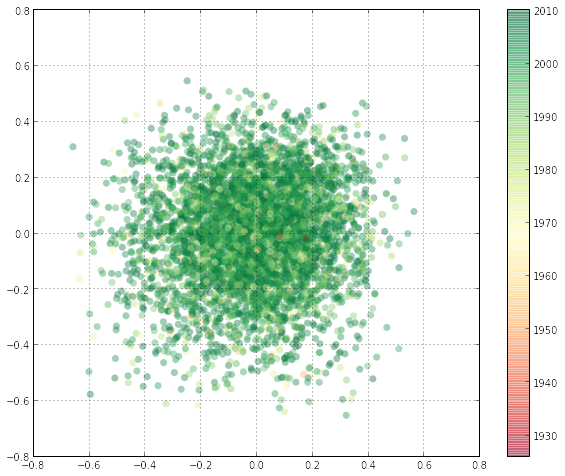

In [12]:
plt.scatter(pca_xy[:,0], pca_xy[:,1], c=pca_colors, alpha=0.4, cmap=plt.get_cmap('RdYlGn'), edgecolors='none', s=50)
plt.grid(True)
plt.colorbar()
plt.show()

In [13]:
select = "C0 < 1950"
pca_data = pca_model.transform(data.where(select))
pca_xy = np.matrix(map(lambda r:r.pca_features.array, pca_data.collect()))
pca_colors = map(lambda r: float(r.C0),data.select('C0').where(select).collect())

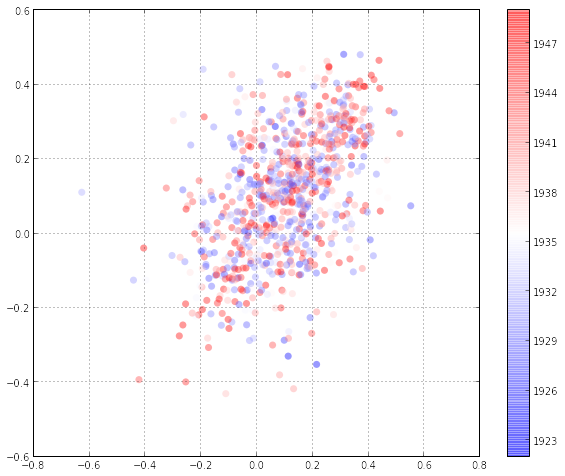

In [14]:
plt.scatter(pca_xy[:,0], pca_xy[:,1], c=pca_colors, alpha=0.4, cmap=plt.get_cmap('bwr'), edgecolors='none', s=50)
plt.grid(True)
plt.colorbar()
plt.show()

In [15]:
import numpy

pca_data = pca_model.transform(data)
points = pca_data.select('pca_features').map(lambda r:r[0].array)
points.first()

array([-0.41516539, -0.0084388 ])

In [16]:
import numpy as np
zeros = np.zeros(10000).reshape(100,100)

xrange=(-0.3,0.3)
yrange=(-0.6,0.6)

def in_range(r, v):
    return r[0] <= v and v < r[1]

def to_range(r, v):
    return (v-r[0])/(r[1]-r[0])

def combine(a,v):
    a[v[0],v[1]]+=1
    return a

def agg(a1,a2):
    return np.add(a1,a2,a1)

counts = points \
    .filter(lambda v: in_range(xrange, v[0]) and in_range(yrange,v[1])) \
    .map(lambda v: (int(to_range(xrange,v[0])*100),int(to_range(yrange,v[1])*100))) \
    .aggregate(zeros, combine, agg)

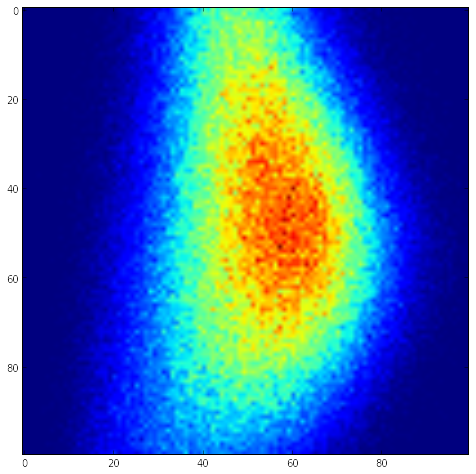

In [17]:
plt.imshow(counts)

In [18]:
pca_data = pca_model.transform(data)
points = pca_data.select('C0','pca_features').map(lambda r:(r[0], r[1].array))
points.first()

(2001, array([-0.41516539, -0.0084388 ]))

In [19]:
res = 20
zeros = np.zeros(res * res).reshape(res,res)

counts = points \
    .filter(lambda (k,v): in_range(xrange, v[0]) and in_range(yrange,v[1])) \
    .map(lambda (k,v): (int((k-1900)/10), (int(to_range(xrange,v[0])*res),int(to_range(yrange,v[1])*res)))) \
    .aggregateByKey(zeros, combine, agg)

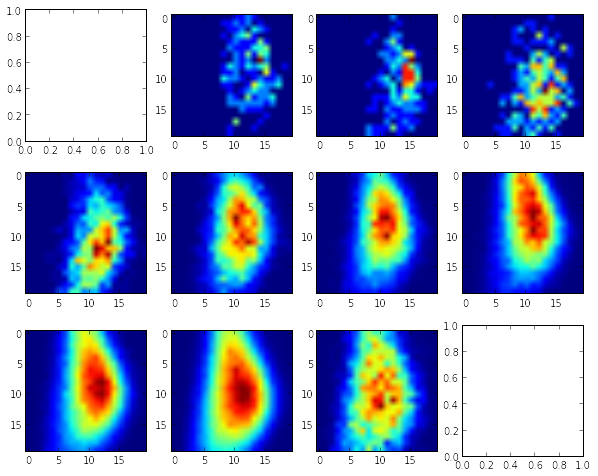

In [20]:
graphs = counts.collectAsMap()
for i in range(1, 13):
    plt.subplot(3,4,i)
    if graphs.has_key(i):
        plt.imshow(graphs[i])
plt.show()